In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as spc
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv("PhoP Transcriptomics Data ACT.csv", index_col= 't')

In [3]:
df

,SCO0033_A,SCO0034_A,SCO0216_A,SCO0217_A,SCO0379_A,SCO1196_A,SCO1394_A,SCO1565_A,SCO1845_A,SCO1906_A,...,SCO5372_R,SCO5373_R,SCO5374_R,SCO5476_R,SCO5477_R,SCO5478_R,SCO5479_R,SCO5480_R,SCO5583_R,SCO5822_R
t,,,,,,,,,,,,,,,,,,,,,
18,0.864064,2.348653,46.440131,20.916829,53.989062,2.392146,3.724273,3.771656,40.079731,10.714830,...,253.524845,430.395615,296.619156,239.028208,330.869518,136.608978,96.056608,48.222725,99.083960,76.902521
20,1.124709,2.576510,62.906719,29.095781,100.415949,2.489382,3.242451,2.508385,36.185278,10.805235,...,214.965442,379.500283,277.456541,190.864461,246.098382,89.671570,70.616825,35.666781,93.529790,70.403093
22,1.328288,2.261109,63.032541,26.199468,204.055836,2.747876,4.232478,2.991798,34.289934,9.808885,...,189.681936,379.384852,226.291806,238.425887,320.091794,116.654221,84.142915,42.992921,111.494336,71.282425
26,1.258114,4.157326,150.586078,87.085684,141.265776,1.860532,3.713970,3.479130,21.527452,8.015482,...,192.378209,392.183071,177.822678,118.945708,240.785172,75.517121,53.815534,28.366103,14.403009,54.282721
30,1.576399,3.242515,226.912632,159.228935,159.394638,2.857389,4.045418,3.323030,29.070825,9.509617,...,229.292662,429.801903,255.608585,168.461705,319.395831,106.425141,79.868396,42.222663,9.442913,61.957117
32,0.795653,1.580155,165.018056,122.441489,129.150819,3.072523,4.287857,2.986843,27.897610,9.268525,...,180.825175,331.318811,211.505967,163.873869,222.896842,91.921484,59.258886,34.773396,6.435247,57.492635
34,1.503097,3.360655,139.151253,94.683070,140.520814,2.742201,4.285257,3.591539,24.491563,7.973855,...,198.673992,401.103598,217.232713,172.483597,316.046918,109.448346,78.966201,42.025087,5.800684,59.404791
38,1.203847,4.282987,174.987600,117.890984,173.130249,2.629905,4.123267,4.359275,26.242336,6.280552,...,197.721674,431.338853,186.828418,178.296792,347.649998,119.195261,85.684383,44.086241,5.060663,62.124331
44,11.686097,3.925436,66.891731,39.016413,276.108604,65.470329,13.732520,61.953496,15.474821,33.993113,...,142.234951,300.964602,139.084034,174.079353,362.295746,123.559303,88.175117,47.833213,4.613126,55.113703


In [4]:
corr = df.corr().values
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

In [5]:
idx

array([4, 4, 1, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 3, 2, 3, 3, 3, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 1, 4,
       2, 2, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2],
      dtype=int32)

In [6]:
df.transpose()

t,18,20,22,26,30,32,34,38,44,50
SCO0033_A,0.864064,1.124709,1.328288,1.258114,1.576399,0.795653,1.503097,1.203847,11.686097,7.368033
SCO0034_A,2.348653,2.576510,2.261109,4.157326,3.242515,1.580155,3.360655,4.282987,3.925436,4.598880
SCO0216_A,46.440131,62.906719,63.032541,150.586078,226.912632,165.018056,139.151253,174.987600,66.891731,92.256308
SCO0217_A,20.916829,29.095781,26.199468,87.085684,159.228935,122.441489,94.683070,117.890984,39.016413,46.459053
SCO0379_A,53.989062,100.415949,204.055836,141.265776,159.394638,129.150819,140.520814,173.130249,276.108604,501.058341
...,...,...,...,...,...,...,...,...,...,...
SCO5478_R,136.608978,89.671570,116.654221,75.517121,106.425141,91.921484,109.448346,119.195261,123.559303,123.261282
SCO5479_R,96.056608,70.616825,84.142915,53.815534,79.868396,59.258886,78.966201,85.684383,88.175117,78.625667
SCO5480_R,48.222725,35.666781,42.992921,28.366103,42.222663,34.773396,42.025087,44.086241,47.833213,37.817755
SCO5583_R,99.083960,93.529790,111.494336,14.403009,9.442913,6.435247,5.800684,5.060663,4.613126,6.341441


In [7]:
df1 = df.transpose()

In [8]:
df1['Ordered'] = [4, 4, 1, 1, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 3, 2, 3, 3, 3, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 1, 4,
       2, 2, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2]

In [9]:
df1.transpose()

,SCO0033_A,SCO0034_A,SCO0216_A,SCO0217_A,SCO0379_A,SCO1196_A,SCO1394_A,SCO1565_A,SCO1845_A,SCO1906_A,...,SCO5372_R,SCO5373_R,SCO5374_R,SCO5476_R,SCO5477_R,SCO5478_R,SCO5479_R,SCO5480_R,SCO5583_R,SCO5822_R
t,,,,,,,,,,,,,,,,,,,,,
18,0.864064,2.348653,46.440131,20.916829,53.989062,2.392146,3.724273,3.771656,40.079731,10.714830,...,253.524845,430.395615,296.619156,239.028208,330.869518,136.608978,96.056608,48.222725,99.083960,76.902521
20,1.124709,2.576510,62.906719,29.095781,100.415949,2.489382,3.242451,2.508385,36.185278,10.805235,...,214.965442,379.500283,277.456541,190.864461,246.098382,89.671570,70.616825,35.666781,93.529790,70.403093
22,1.328288,2.261109,63.032541,26.199468,204.055836,2.747876,4.232478,2.991798,34.289934,9.808885,...,189.681936,379.384852,226.291806,238.425887,320.091794,116.654221,84.142915,42.992921,111.494336,71.282425
26,1.258114,4.157326,150.586078,87.085684,141.265776,1.860532,3.713970,3.479130,21.527452,8.015482,...,192.378209,392.183071,177.822678,118.945708,240.785172,75.517121,53.815534,28.366103,14.403009,54.282721
30,1.576399,3.242515,226.912632,159.228935,159.394638,2.857389,4.045418,3.323030,29.070825,9.509617,...,229.292662,429.801903,255.608585,168.461705,319.395831,106.425141,79.868396,42.222663,9.442913,61.957117
32,0.795653,1.580155,165.018056,122.441489,129.150819,3.072523,4.287857,2.986843,27.897610,9.268525,...,180.825175,331.318811,211.505967,163.873869,222.896842,91.921484,59.258886,34.773396,6.435247,57.492635
34,1.503097,3.360655,139.151253,94.683070,140.520814,2.742201,4.285257,3.591539,24.491563,7.973855,...,198.673992,401.103598,217.232713,172.483597,316.046918,109.448346,78.966201,42.025087,5.800684,59.404791
38,1.203847,4.282987,174.987600,117.890984,173.130249,2.629905,4.123267,4.359275,26.242336,6.280552,...,197.721674,431.338853,186.828418,178.296792,347.649998,119.195261,85.684383,44.086241,5.060663,62.124331
44,11.686097,3.925436,66.891731,39.016413,276.108604,65.470329,13.732520,61.953496,15.474821,33.993113,...,142.234951,300.964602,139.084034,174.079353,362.295746,123.559303,88.175117,47.833213,4.613126,55.113703


In [10]:
df2 = df1.transpose()

In [11]:
df2.sort_values(by='Ordered', axis= 1)

,SCO0216_A,SCO0217_A,SCO2263_R,SCO5822_R,SCO5112_R,SCO4858_R,SCO4857_R,SCO4855_R,SCO2594_R,SCO5032_A,...,SCO4947_A,SCO4881_A,SCO4880_A,SCO4879_A,SCO4878_A,SCO4877_A,SCO4876_A,SCO4875_A,SCO4882_A,SCO7697_A
t,,,,,,,,,,,,,,,,,,,,,
18,46.440131,20.916829,3.360674,76.902521,119.010532,339.290906,209.287795,320.436314,121.972402,262.597690,...,4.233185,1.734184,0.638588,0.799341,1.085344,2.158063,3.082497,5.532052,1.583361,1.628016
20,62.906719,29.095781,4.721325,70.403093,101.549411,292.280868,177.676922,279.551790,140.445721,432.490396,...,8.319563,2.347813,0.716942,1.291787,1.260678,2.618047,4.450814,7.124187,1.661453,1.644362
22,63.032541,26.199468,5.184006,71.282425,131.788485,283.261787,185.523305,276.416214,143.278576,439.266290,...,11.287133,3.034076,0.638431,1.273147,1.728677,2.642195,3.642055,5.563612,1.905429,1.815111
26,150.586078,87.085684,5.678299,54.282721,73.424603,177.932085,122.912238,190.284486,112.608601,285.145103,...,5.145875,1.770959,0.826031,0.957142,1.469120,2.200632,3.100168,6.236717,2.439380,1.440867
30,226.912632,159.228935,8.290367,61.957117,70.362838,202.562552,154.451780,254.547404,157.773847,363.210043,...,9.163392,3.200720,0.799777,1.772857,1.860095,2.693511,2.761503,5.191975,2.010083,2.995300
32,165.018056,122.441489,8.456856,57.492635,72.445632,209.739322,148.397139,214.747051,145.339794,294.018596,...,7.676508,2.654025,0.764848,1.382890,1.822459,3.043637,3.030019,5.298040,2.384182,1.863878
34,139.151253,94.683070,5.819670,59.404791,76.982437,200.713111,147.889676,217.400485,136.404679,322.168699,...,8.155334,6.012673,1.186113,3.406069,2.004060,3.020813,2.593794,5.618760,3.870417,2.659234
38,174.987600,117.890984,5.805950,62.124331,90.954505,214.841604,162.862730,241.287187,134.549430,330.746541,...,8.987445,4.897312,1.357826,1.705884,1.985354,1.985726,2.541653,4.664851,3.393970,2.026715
44,66.891731,39.016413,3.454872,55.113703,82.976058,170.775196,151.311100,191.797968,60.898895,159.274724,...,18.053359,137.730467,19.242987,27.538997,14.262238,17.597363,17.488733,42.787486,52.889686,17.071776


In [12]:
df3 = df2.sort_values(by='Ordered', axis= 1)

In [13]:
df3.head(10)

,SCO0216_A,SCO0217_A,SCO2263_R,SCO5822_R,SCO5112_R,SCO4858_R,SCO4857_R,SCO4855_R,SCO2594_R,SCO5032_A,...,SCO4947_A,SCO4881_A,SCO4880_A,SCO4879_A,SCO4878_A,SCO4877_A,SCO4876_A,SCO4875_A,SCO4882_A,SCO7697_A
t,,,,,,,,,,,,,,,,,,,,,
18,46.440131,20.916829,3.360674,76.902521,119.010532,339.290906,209.287795,320.436314,121.972402,262.597690,...,4.233185,1.734184,0.638588,0.799341,1.085344,2.158063,3.082497,5.532052,1.583361,1.628016
20,62.906719,29.095781,4.721325,70.403093,101.549411,292.280868,177.676922,279.551790,140.445721,432.490396,...,8.319563,2.347813,0.716942,1.291787,1.260678,2.618047,4.450814,7.124187,1.661453,1.644362
22,63.032541,26.199468,5.184006,71.282425,131.788485,283.261787,185.523305,276.416214,143.278576,439.266290,...,11.287133,3.034076,0.638431,1.273147,1.728677,2.642195,3.642055,5.563612,1.905429,1.815111
26,150.586078,87.085684,5.678299,54.282721,73.424603,177.932085,122.912238,190.284486,112.608601,285.145103,...,5.145875,1.770959,0.826031,0.957142,1.469120,2.200632,3.100168,6.236717,2.439380,1.440867
30,226.912632,159.228935,8.290367,61.957117,70.362838,202.562552,154.451780,254.547404,157.773847,363.210043,...,9.163392,3.200720,0.799777,1.772857,1.860095,2.693511,2.761503,5.191975,2.010083,2.995300
32,165.018056,122.441489,8.456856,57.492635,72.445632,209.739322,148.397139,214.747051,145.339794,294.018596,...,7.676508,2.654025,0.764848,1.382890,1.822459,3.043637,3.030019,5.298040,2.384182,1.863878
34,139.151253,94.683070,5.819670,59.404791,76.982437,200.713111,147.889676,217.400485,136.404679,322.168699,...,8.155334,6.012673,1.186113,3.406069,2.004060,3.020813,2.593794,5.618760,3.870417,2.659234
38,174.987600,117.890984,5.805950,62.124331,90.954505,214.841604,162.862730,241.287187,134.549430,330.746541,...,8.987445,4.897312,1.357826,1.705884,1.985354,1.985726,2.541653,4.664851,3.393970,2.026715
44,66.891731,39.016413,3.454872,55.113703,82.976058,170.775196,151.311100,191.797968,60.898895,159.274724,...,18.053359,137.730467,19.242987,27.538997,14.262238,17.597363,17.488733,42.787486,52.889686,17.071776


In [14]:
df4= df3.head(10)

In [15]:
df4

,SCO0216_A,SCO0217_A,SCO2263_R,SCO5822_R,SCO5112_R,SCO4858_R,SCO4857_R,SCO4855_R,SCO2594_R,SCO5032_A,...,SCO4947_A,SCO4881_A,SCO4880_A,SCO4879_A,SCO4878_A,SCO4877_A,SCO4876_A,SCO4875_A,SCO4882_A,SCO7697_A
t,,,,,,,,,,,,,,,,,,,,,
18,46.440131,20.916829,3.360674,76.902521,119.010532,339.290906,209.287795,320.436314,121.972402,262.597690,...,4.233185,1.734184,0.638588,0.799341,1.085344,2.158063,3.082497,5.532052,1.583361,1.628016
20,62.906719,29.095781,4.721325,70.403093,101.549411,292.280868,177.676922,279.551790,140.445721,432.490396,...,8.319563,2.347813,0.716942,1.291787,1.260678,2.618047,4.450814,7.124187,1.661453,1.644362
22,63.032541,26.199468,5.184006,71.282425,131.788485,283.261787,185.523305,276.416214,143.278576,439.266290,...,11.287133,3.034076,0.638431,1.273147,1.728677,2.642195,3.642055,5.563612,1.905429,1.815111
26,150.586078,87.085684,5.678299,54.282721,73.424603,177.932085,122.912238,190.284486,112.608601,285.145103,...,5.145875,1.770959,0.826031,0.957142,1.469120,2.200632,3.100168,6.236717,2.439380,1.440867
30,226.912632,159.228935,8.290367,61.957117,70.362838,202.562552,154.451780,254.547404,157.773847,363.210043,...,9.163392,3.200720,0.799777,1.772857,1.860095,2.693511,2.761503,5.191975,2.010083,2.995300
32,165.018056,122.441489,8.456856,57.492635,72.445632,209.739322,148.397139,214.747051,145.339794,294.018596,...,7.676508,2.654025,0.764848,1.382890,1.822459,3.043637,3.030019,5.298040,2.384182,1.863878
34,139.151253,94.683070,5.819670,59.404791,76.982437,200.713111,147.889676,217.400485,136.404679,322.168699,...,8.155334,6.012673,1.186113,3.406069,2.004060,3.020813,2.593794,5.618760,3.870417,2.659234
38,174.987600,117.890984,5.805950,62.124331,90.954505,214.841604,162.862730,241.287187,134.549430,330.746541,...,8.987445,4.897312,1.357826,1.705884,1.985354,1.985726,2.541653,4.664851,3.393970,2.026715
44,66.891731,39.016413,3.454872,55.113703,82.976058,170.775196,151.311100,191.797968,60.898895,159.274724,...,18.053359,137.730467,19.242987,27.538997,14.262238,17.597363,17.488733,42.787486,52.889686,17.071776


In [16]:
df5 = df4.corr(method='pearson')

In [17]:
df5

,SCO0216_A,SCO0217_A,SCO2263_R,SCO5822_R,SCO5112_R,SCO4858_R,SCO4857_R,SCO4855_R,SCO2594_R,SCO5032_A,...,SCO4947_A,SCO4881_A,SCO4880_A,SCO4879_A,SCO4878_A,SCO4877_A,SCO4876_A,SCO4875_A,SCO4882_A,SCO7697_A
SCO0216_A,1.000000,0.990103,0.783097,-0.285293,-0.746726,-0.434270,-0.417710,-0.223861,0.431726,0.145122,...,-0.222958,-0.344367,-0.336536,-0.324511,-0.305061,-0.344691,-0.409199,-0.368913,-0.335885,-0.295568
SCO0217_A,0.990103,1.000000,0.817236,-0.248715,-0.759803,-0.399965,-0.363631,-0.189220,0.454728,0.142679,...,-0.199943,-0.330781,-0.318949,-0.300665,-0.283736,-0.325606,-0.378242,-0.341393,-0.319826,-0.272769
SCO2263_R,0.783097,0.817236,1.000000,0.167187,-0.513338,0.020248,0.000372,0.177161,0.783384,0.558703,...,-0.307818,-0.591241,-0.563667,-0.527216,-0.515213,-0.557996,-0.472961,-0.493025,-0.572511,-0.510370
SCO5822_R,-0.285293,-0.248715,0.167187,1.000000,0.565186,0.964423,0.957750,0.983418,0.650629,0.728313,...,-0.378297,-0.574630,-0.540024,-0.513463,-0.532748,-0.563665,-0.318561,-0.399745,-0.561838,-0.517795
SCO5112_R,-0.746726,-0.759803,-0.513338,0.565186,1.000000,0.673862,0.668674,0.556402,0.008883,0.243370,...,-0.012121,-0.098060,-0.115481,-0.138778,-0.137568,-0.113832,-0.067671,-0.114912,-0.116118,-0.145983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCO4877_A,-0.344691,-0.325606,-0.557996,-0.563665,-0.113832,-0.546514,-0.380173,-0.590568,-0.873628,-0.752134,...,0.853269,0.997466,0.995563,0.991422,0.992935,1.000000,0.937920,0.963797,0.997156,0.991896
SCO4876_A,-0.409199,-0.378242,-0.472961,-0.318561,-0.067671,-0.344303,-0.166581,-0.380087,-0.738626,-0.554202,...,0.851369,0.927120,0.950400,0.960955,0.956905,0.937920,1.000000,0.994053,0.940351,0.954758
SCO4875_A,-0.368913,-0.341393,-0.493025,-0.399745,-0.114912,-0.421807,-0.241652,-0.453725,-0.787997,-0.630477,...,0.848545,0.956386,0.975183,0.983200,0.979722,0.963797,0.994053,1.000000,0.967817,0.978297
SCO4882_A,-0.335885,-0.319826,-0.572511,-0.561838,-0.116118,-0.551096,-0.378680,-0.591068,-0.884656,-0.760742,...,0.847394,0.998686,0.999342,0.994215,0.996041,0.997156,0.940351,0.967817,1.000000,0.993378


In [18]:
df5.round(1)

,SCO0216_A,SCO0217_A,SCO2263_R,SCO5822_R,SCO5112_R,SCO4858_R,SCO4857_R,SCO4855_R,SCO2594_R,SCO5032_A,...,SCO4947_A,SCO4881_A,SCO4880_A,SCO4879_A,SCO4878_A,SCO4877_A,SCO4876_A,SCO4875_A,SCO4882_A,SCO7697_A
SCO0216_A,1.0,1.0,0.8,-0.3,-0.7,-0.4,-0.4,-0.2,0.4,0.1,...,-0.2,-0.3,-0.3,-0.3,-0.3,-0.3,-0.4,-0.4,-0.3,-0.3
SCO0217_A,1.0,1.0,0.8,-0.2,-0.8,-0.4,-0.4,-0.2,0.5,0.1,...,-0.2,-0.3,-0.3,-0.3,-0.3,-0.3,-0.4,-0.3,-0.3,-0.3
SCO2263_R,0.8,0.8,1.0,0.2,-0.5,0.0,0.0,0.2,0.8,0.6,...,-0.3,-0.6,-0.6,-0.5,-0.5,-0.6,-0.5,-0.5,-0.6,-0.5
SCO5822_R,-0.3,-0.2,0.2,1.0,0.6,1.0,1.0,1.0,0.7,0.7,...,-0.4,-0.6,-0.5,-0.5,-0.5,-0.6,-0.3,-0.4,-0.6,-0.5
SCO5112_R,-0.7,-0.8,-0.5,0.6,1.0,0.7,0.7,0.6,0.0,0.2,...,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCO4877_A,-0.3,-0.3,-0.6,-0.6,-0.1,-0.5,-0.4,-0.6,-0.9,-0.8,...,0.9,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0
SCO4876_A,-0.4,-0.4,-0.5,-0.3,-0.1,-0.3,-0.2,-0.4,-0.7,-0.6,...,0.9,0.9,1.0,1.0,1.0,0.9,1.0,1.0,0.9,1.0
SCO4875_A,-0.4,-0.3,-0.5,-0.4,-0.1,-0.4,-0.2,-0.5,-0.8,-0.6,...,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
SCO4882_A,-0.3,-0.3,-0.6,-0.6,-0.1,-0.6,-0.4,-0.6,-0.9,-0.8,...,0.8,1.0,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0


In [19]:
df6 = df5.round(1)

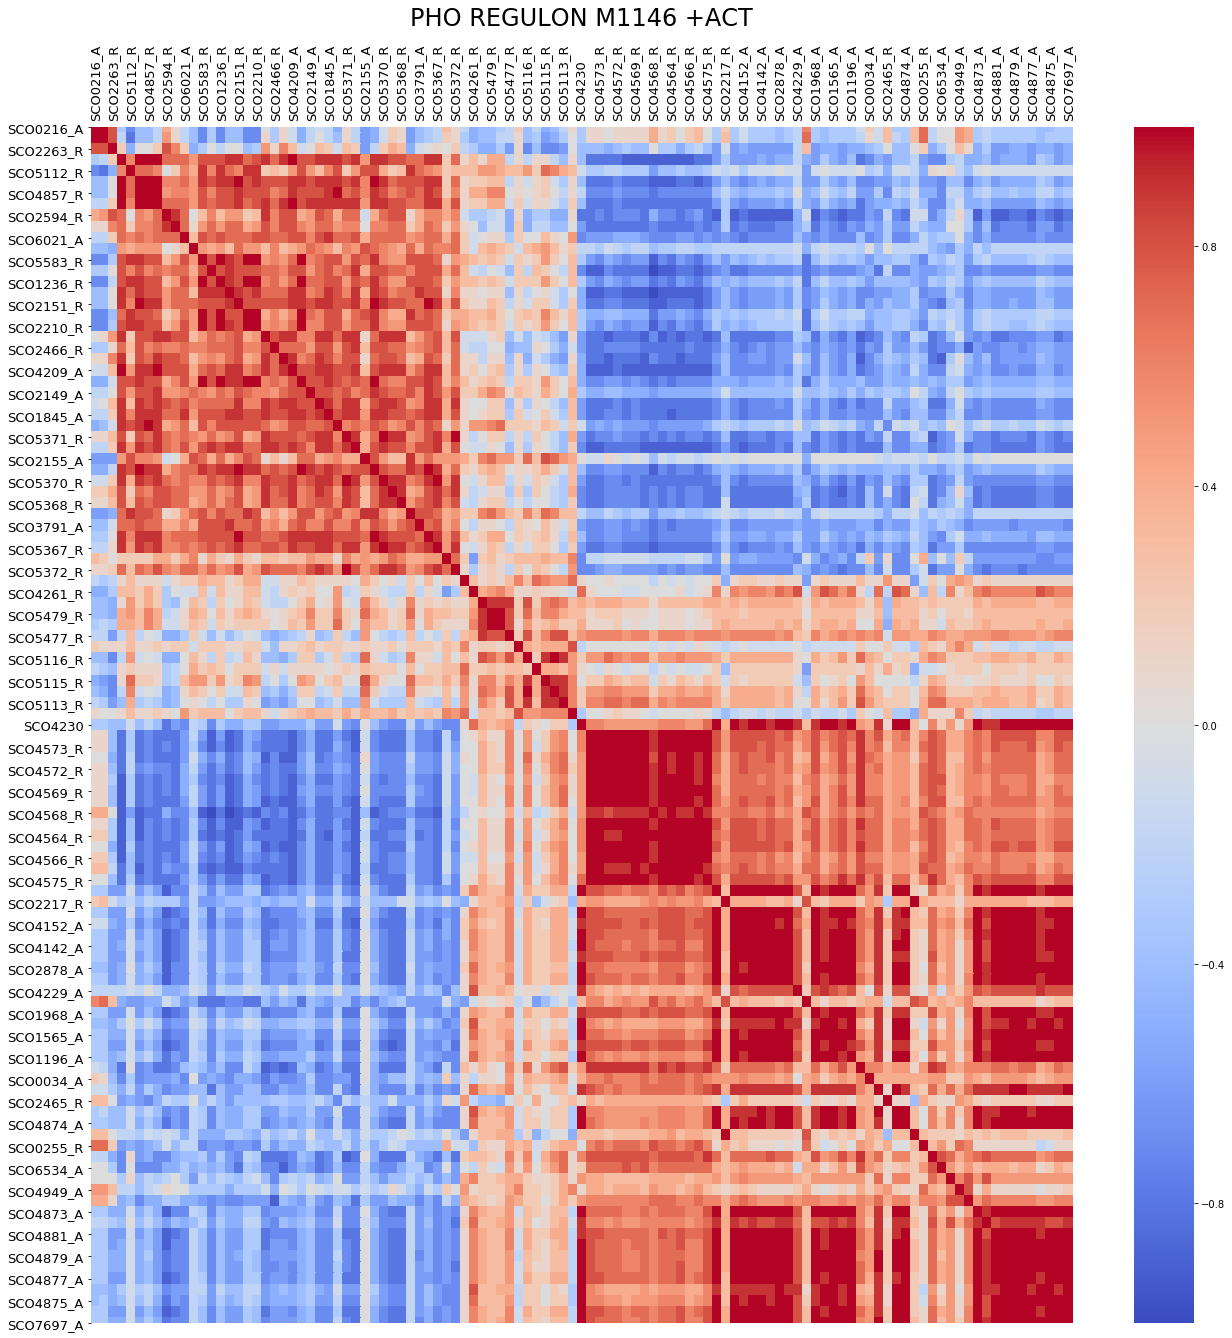

In [24]:
plt.figure(figsize=(22, 22))
plt.title('PHO REGULON M1146 +ACT', fontsize=24, y=1.08)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(range(df6.shape[1]), df6.columns, fontsize=13, rotation=90)
plt.yticks(range(df6.shape[1]), df6.columns, fontsize=13)
cbar_kws = {"shrink":1,
            'extend':'min', 
            'extendfrac':.1, 
            "drawedges":True}
sn.heatmap(df6, annot=False, linewidths=0, square = False, cmap = 'coolwarm', cbar=True)

In [25]:
df7 = pd.read_csv("pho activated act.csv", index_col='t')

In [26]:
corr = df7.corr().values
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

In [27]:
idx

array([4, 4, 3, 3, 4, 4, 4, 4, 1, 4, 4, 4, 3, 2, 1, 1, 2, 1, 4, 4, 4, 1,
       4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       1, 2, 1, 2, 2, 2, 2, 4, 4, 1, 4], dtype=int32)

In [28]:
df7.transpose()

t,18,20,22,26,30,32,34,38,44,50
SCO0033,0.864064,1.124709,1.328288,1.258114,1.576399,0.795653,1.503097,1.203847,11.686097,7.368033
SCO0034,2.348653,2.576510,2.261109,4.157326,3.242515,1.580155,3.360655,4.282987,3.925436,4.598880
SCO0216,46.440131,62.906719,63.032541,150.586078,226.912632,165.018056,139.151253,174.987600,66.891731,92.256308
SCO0217,20.916829,29.095781,26.199468,87.085684,159.228935,122.441489,94.683070,117.890984,39.016413,46.459053
SCO0379,53.989062,100.415949,204.055836,141.265776,159.394638,129.150819,140.520814,173.130249,276.108604,501.058341
SCO1196,2.392146,2.489382,2.747876,1.860532,2.857389,3.072523,2.742201,2.629905,65.470329,23.105486
SCO1394,3.724273,3.242451,4.232478,3.713970,4.045418,4.287857,4.285257,4.123267,13.732520,11.092777
SCO1565,3.771656,2.508385,2.991798,3.479130,3.323030,2.986843,3.591539,4.359275,61.953496,26.985797
SCO1845,40.079731,36.185278,34.289934,21.527452,29.070825,27.897610,24.491563,26.242336,15.474821,16.826092
SCO1906,10.714830,10.805235,9.808885,8.015482,9.509617,9.268525,7.973855,6.280552,33.993113,15.409690


In [29]:
df8 = df7.transpose()

In [30]:
df8['Ordered'] = [4, 4, 3, 3, 4, 4, 4, 4, 1, 4, 4, 4, 3, 2, 1, 1, 2, 1, 4, 4, 4, 1,
       4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       1, 2, 1, 2, 2, 2, 2, 4, 4, 1, 4]

In [31]:
df8.transpose()

,SCO0033,SCO0034,SCO0216,SCO0217,SCO0379,SCO1196,SCO1394,SCO1565,SCO1845,SCO1906,...,SCO5447,SCO6021,SCO6022,SCO6023,SCO6024,SCO6025,SCO6534,SCO6535,SCO7630,SCO7697
t,,,,,,,,,,,,,,,,,,,,,
18,0.864064,2.348653,46.440131,20.916829,53.989062,2.392146,3.724273,3.771656,40.079731,10.714830,...,2.438179,4.121457,1.775116,1.636010,1.914215,1.814000,2.433024,1.270916,15.866453,1.628016
20,1.124709,2.576510,62.906719,29.095781,100.415949,2.489382,3.242451,2.508385,36.185278,10.805235,...,1.779272,4.001383,1.192695,1.465639,2.079953,1.639349,2.290980,1.542124,17.047287,1.644362
22,1.328288,2.261109,63.032541,26.199468,204.055836,2.747876,4.232478,2.991798,34.289934,9.808885,...,2.145578,4.463813,1.838980,1.964507,2.364770,1.068512,3.442666,1.872022,14.873074,1.815111
26,1.258114,4.157326,150.586078,87.085684,141.265776,1.860532,3.713970,3.479130,21.527452,8.015482,...,2.373688,2.897685,1.263677,1.636804,2.011823,1.211145,3.125809,1.469762,11.578922,1.440867
30,1.576399,3.242515,226.912632,159.228935,159.394638,2.857389,4.045418,3.323030,29.070825,9.509617,...,2.376593,3.729779,2.182482,2.011453,2.409220,1.309005,2.723814,1.568256,16.697089,2.995300
32,0.795653,1.580155,165.018056,122.441489,129.150819,3.072523,4.287857,2.986843,27.897610,9.268525,...,1.265442,3.631774,1.134941,1.538238,1.422980,0.908451,2.987188,1.597745,14.527391,1.863878
34,1.503097,3.360655,139.151253,94.683070,140.520814,2.742201,4.285257,3.591539,24.491563,7.973855,...,1.986956,3.658277,1.149207,1.202278,1.733289,1.306352,3.284850,1.623043,13.666662,2.659234
38,1.203847,4.282987,174.987600,117.890984,173.130249,2.629905,4.123267,4.359275,26.242336,6.280552,...,1.500609,3.027787,1.233354,1.689693,1.576005,1.319534,3.254189,1.697972,12.503318,2.026715
44,11.686097,3.925436,66.891731,39.016413,276.108604,65.470329,13.732520,61.953496,15.474821,33.993113,...,2.165421,2.292945,1.012737,1.502505,2.010221,1.161130,3.089609,2.006647,11.165684,17.071776


In [32]:
df9 = df8.transpose()

In [34]:
df9.sort_values(by='Ordered', axis= 1)

,SCO4209,SCO3791,SCO7630,SCO5032,SCO2156,SCO4425,SCO2150,SCO2149,SCO1845,SCO6021,...,SCO3790,SCO4142,SCO4145,SCO4152,SCO4228,SCO4872,SCO4873,SCO4874,SCO2878,SCO7697
t,,,,,,,,,,,,,,,,,,,,,
18,317.345491,14.370430,15.866453,262.597690,409.709385,180.389562,440.425507,249.520373,40.079731,4.121457,...,3.102918,4.670576,7.785068,5.074486,18.516913,4.680370,3.134872,0.434031,6.263073,1.628016
20,296.726473,11.252452,17.047287,432.490396,375.330321,174.194493,423.194910,237.360447,36.185278,4.001383,...,3.543328,5.507506,7.701344,6.169444,18.001478,5.287183,2.691396,0.689367,6.115093,1.644362
22,310.145840,13.029261,14.873074,439.266290,350.825220,190.427788,380.787533,213.847274,34.289934,4.463813,...,2.740738,4.570975,8.198344,6.344385,19.563510,7.070135,2.672877,0.963674,7.581366,1.815111
26,222.160502,11.061345,11.578922,285.145103,235.985975,160.807668,299.327451,166.084249,21.527452,2.897685,...,3.199481,3.585833,7.772262,8.138321,17.753990,4.632877,2.715470,0.883516,5.086610,1.440867
30,276.304899,8.784423,16.697089,363.210043,266.557105,117.960464,367.468482,225.895851,29.070825,3.729779,...,3.794793,4.484490,9.256497,9.805795,23.334442,7.388093,2.972097,0.911224,5.472155,2.995300
32,237.467571,10.568107,14.527391,294.018596,222.293909,95.373624,273.759715,176.048876,27.897610,3.631774,...,3.544029,9.929967,7.316772,5.803598,21.592176,6.019637,3.519468,0.769663,4.589088,1.863878
34,247.682890,8.891418,13.666662,322.168699,258.402832,118.935667,326.356902,181.181054,24.491563,3.658277,...,4.170509,16.984440,9.214698,7.675231,25.643256,7.484644,4.241082,0.890818,5.317742,2.659234
38,247.358939,11.402430,12.503318,330.746541,284.480529,111.019541,362.142027,227.254317,26.242336,3.027787,...,3.408955,13.464463,8.656143,8.649082,22.346021,6.702766,3.341695,0.712347,4.688744,2.026715
44,196.501959,7.370726,11.165684,159.274724,219.532081,55.540739,285.972168,182.365957,15.474821,2.292945,...,48.014909,613.409833,35.761608,20.666068,107.137887,32.560446,67.968662,6.917740,43.972741,17.071776


In [35]:
df10 = df9.sort_values(by='Ordered', axis=1)

In [36]:
df10.head(10)

,SCO4209,SCO3791,SCO7630,SCO5032,SCO2156,SCO4425,SCO2150,SCO2149,SCO1845,SCO6021,...,SCO3790,SCO4142,SCO4145,SCO4152,SCO4228,SCO4872,SCO4873,SCO4874,SCO2878,SCO7697
t,,,,,,,,,,,,,,,,,,,,,
18,317.345491,14.370430,15.866453,262.597690,409.709385,180.389562,440.425507,249.520373,40.079731,4.121457,...,3.102918,4.670576,7.785068,5.074486,18.516913,4.680370,3.134872,0.434031,6.263073,1.628016
20,296.726473,11.252452,17.047287,432.490396,375.330321,174.194493,423.194910,237.360447,36.185278,4.001383,...,3.543328,5.507506,7.701344,6.169444,18.001478,5.287183,2.691396,0.689367,6.115093,1.644362
22,310.145840,13.029261,14.873074,439.266290,350.825220,190.427788,380.787533,213.847274,34.289934,4.463813,...,2.740738,4.570975,8.198344,6.344385,19.563510,7.070135,2.672877,0.963674,7.581366,1.815111
26,222.160502,11.061345,11.578922,285.145103,235.985975,160.807668,299.327451,166.084249,21.527452,2.897685,...,3.199481,3.585833,7.772262,8.138321,17.753990,4.632877,2.715470,0.883516,5.086610,1.440867
30,276.304899,8.784423,16.697089,363.210043,266.557105,117.960464,367.468482,225.895851,29.070825,3.729779,...,3.794793,4.484490,9.256497,9.805795,23.334442,7.388093,2.972097,0.911224,5.472155,2.995300
32,237.467571,10.568107,14.527391,294.018596,222.293909,95.373624,273.759715,176.048876,27.897610,3.631774,...,3.544029,9.929967,7.316772,5.803598,21.592176,6.019637,3.519468,0.769663,4.589088,1.863878
34,247.682890,8.891418,13.666662,322.168699,258.402832,118.935667,326.356902,181.181054,24.491563,3.658277,...,4.170509,16.984440,9.214698,7.675231,25.643256,7.484644,4.241082,0.890818,5.317742,2.659234
38,247.358939,11.402430,12.503318,330.746541,284.480529,111.019541,362.142027,227.254317,26.242336,3.027787,...,3.408955,13.464463,8.656143,8.649082,22.346021,6.702766,3.341695,0.712347,4.688744,2.026715
44,196.501959,7.370726,11.165684,159.274724,219.532081,55.540739,285.972168,182.365957,15.474821,2.292945,...,48.014909,613.409833,35.761608,20.666068,107.137887,32.560446,67.968662,6.917740,43.972741,17.071776


In [37]:
df11 = df10.head(10)

In [38]:
df11

,SCO4209,SCO3791,SCO7630,SCO5032,SCO2156,SCO4425,SCO2150,SCO2149,SCO1845,SCO6021,...,SCO3790,SCO4142,SCO4145,SCO4152,SCO4228,SCO4872,SCO4873,SCO4874,SCO2878,SCO7697
t,,,,,,,,,,,,,,,,,,,,,
18,317.345491,14.370430,15.866453,262.597690,409.709385,180.389562,440.425507,249.520373,40.079731,4.121457,...,3.102918,4.670576,7.785068,5.074486,18.516913,4.680370,3.134872,0.434031,6.263073,1.628016
20,296.726473,11.252452,17.047287,432.490396,375.330321,174.194493,423.194910,237.360447,36.185278,4.001383,...,3.543328,5.507506,7.701344,6.169444,18.001478,5.287183,2.691396,0.689367,6.115093,1.644362
22,310.145840,13.029261,14.873074,439.266290,350.825220,190.427788,380.787533,213.847274,34.289934,4.463813,...,2.740738,4.570975,8.198344,6.344385,19.563510,7.070135,2.672877,0.963674,7.581366,1.815111
26,222.160502,11.061345,11.578922,285.145103,235.985975,160.807668,299.327451,166.084249,21.527452,2.897685,...,3.199481,3.585833,7.772262,8.138321,17.753990,4.632877,2.715470,0.883516,5.086610,1.440867
30,276.304899,8.784423,16.697089,363.210043,266.557105,117.960464,367.468482,225.895851,29.070825,3.729779,...,3.794793,4.484490,9.256497,9.805795,23.334442,7.388093,2.972097,0.911224,5.472155,2.995300
32,237.467571,10.568107,14.527391,294.018596,222.293909,95.373624,273.759715,176.048876,27.897610,3.631774,...,3.544029,9.929967,7.316772,5.803598,21.592176,6.019637,3.519468,0.769663,4.589088,1.863878
34,247.682890,8.891418,13.666662,322.168699,258.402832,118.935667,326.356902,181.181054,24.491563,3.658277,...,4.170509,16.984440,9.214698,7.675231,25.643256,7.484644,4.241082,0.890818,5.317742,2.659234
38,247.358939,11.402430,12.503318,330.746541,284.480529,111.019541,362.142027,227.254317,26.242336,3.027787,...,3.408955,13.464463,8.656143,8.649082,22.346021,6.702766,3.341695,0.712347,4.688744,2.026715
44,196.501959,7.370726,11.165684,159.274724,219.532081,55.540739,285.972168,182.365957,15.474821,2.292945,...,48.014909,613.409833,35.761608,20.666068,107.137887,32.560446,67.968662,6.917740,43.972741,17.071776


In [39]:
df12 = df11.corr(method='pearson')

In [40]:
df12.round(1)

,SCO4209,SCO3791,SCO7630,SCO5032,SCO2156,SCO4425,SCO2150,SCO2149,SCO1845,SCO6021,...,SCO3790,SCO4142,SCO4145,SCO4152,SCO4228,SCO4872,SCO4873,SCO4874,SCO2878,SCO7697
SCO4209,1.0,0.7,0.9,0.8,0.8,0.8,0.9,0.8,0.9,0.8,...,-0.7,-0.7,-0.7,-0.7,-0.7,-0.5,-0.6,-0.6,-0.6,-0.6
SCO3791,0.7,1.0,0.4,0.4,0.8,0.8,0.7,0.6,0.8,0.6,...,-0.6,-0.6,-0.6,-0.7,-0.7,-0.6,-0.6,-0.6,-0.6,-0.7
SCO7630,0.9,0.4,1.0,0.8,0.7,0.6,0.8,0.7,0.8,0.7,...,-0.7,-0.6,-0.6,-0.7,-0.7,-0.4,-0.6,-0.5,-0.6,-0.6
SCO5032,0.8,0.4,0.8,1.0,0.6,0.7,0.7,0.5,0.7,0.7,...,-0.8,-0.8,-0.8,-0.7,-0.8,-0.6,-0.7,-0.6,-0.7,-0.7
SCO2156,0.8,0.8,0.7,0.6,1.0,0.8,1.0,0.9,0.9,0.7,...,-0.5,-0.5,-0.5,-0.6,-0.5,-0.4,-0.5,-0.5,-0.4,-0.5
SCO4425,0.8,0.8,0.6,0.7,0.8,1.0,0.8,0.5,0.8,0.7,...,-0.7,-0.7,-0.7,-0.8,-0.8,-0.7,-0.7,-0.7,-0.7,-0.7
SCO2150,0.9,0.7,0.8,0.7,1.0,0.8,1.0,0.9,0.9,0.7,...,-0.6,-0.5,-0.5,-0.6,-0.6,-0.4,-0.5,-0.5,-0.5,-0.5
SCO2149,0.8,0.6,0.7,0.5,0.9,0.5,0.9,1.0,0.8,0.6,...,-0.4,-0.4,-0.4,-0.4,-0.4,-0.3,-0.4,-0.4,-0.4,-0.4
SCO1845,0.9,0.8,0.8,0.7,0.9,0.8,0.9,0.8,1.0,0.9,...,-0.7,-0.7,-0.7,-0.8,-0.7,-0.6,-0.7,-0.7,-0.7,-0.7
SCO6021,0.8,0.6,0.7,0.7,0.7,0.7,0.7,0.6,0.9,1.0,...,-0.7,-0.7,-0.7,-0.8,-0.7,-0.7,-0.7,-0.7,-0.7,-0.7


In [41]:
df13 = df12.round(1)

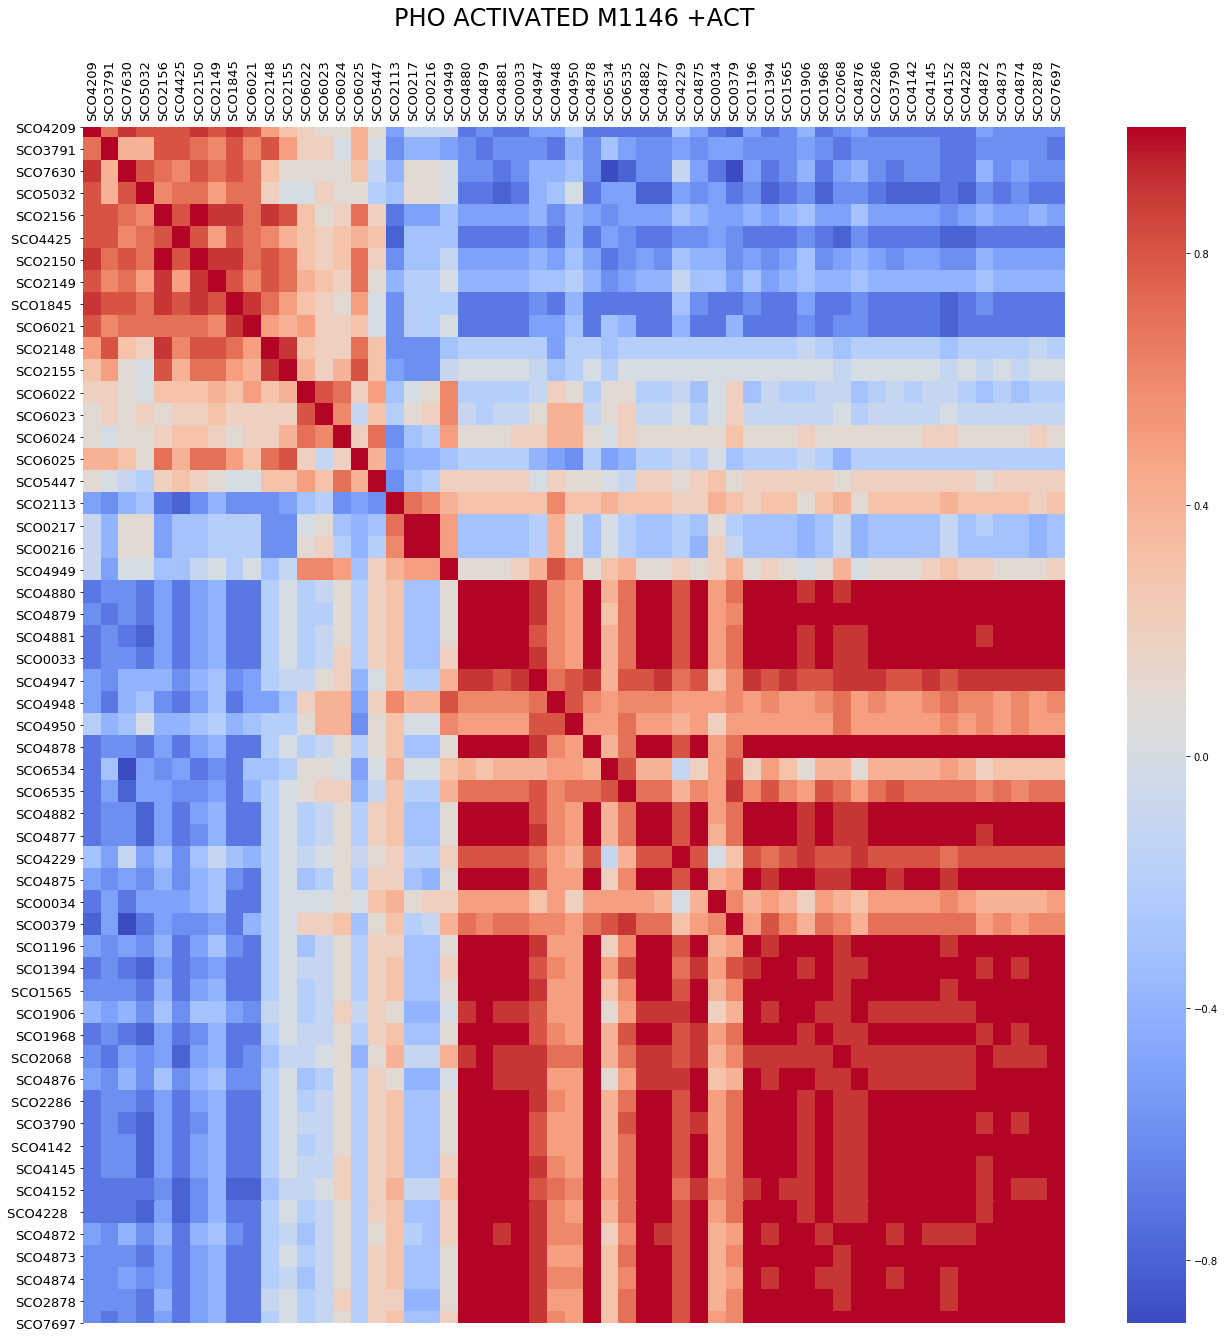

In [42]:
plt.figure(figsize=(22, 22))
plt.title('PHO ACTIVATED M1146 +ACT', fontsize=24, y=1.08)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(range(df13.shape[1]), df13.columns, fontsize=13, rotation=90)
plt.yticks(range(df13.shape[1]), df13.columns, fontsize=13)
cbar_kws = {"shrink":1,
            'extend':'min', 
            'extendfrac':.1, 
            "drawedges":True}
sn.heatmap(df13, annot=False, linewidths=0, square = False, cmap = 'coolwarm', cbar=True)

In [43]:
df14 = pd.read_csv("pho repressed act.csv", index_col= 't')

In [44]:
df14

,SCO0255,SCO1236,SCO1478,SCO2151,SCO2198,SCO2207,SCO2210,SCO2217,SCO2262,SCO2263,...,SCO5372,SCO5373,SCO5374,SCO5476,SCO5477,SCO5478,SCO5479,SCO5480,SCO5583,SCO5822
t,,,,,,,,,,,,,,,,,,,,,
18,2.091297,94.256154,2226.717599,1034.264376,642.520261,18.807218,732.027049,6.196533,20.007040,3.360674,...,253.524845,430.395615,296.619156,239.028208,330.869518,136.608978,96.056608,48.222725,99.083960,76.902521
20,1.547802,87.310754,2022.012697,958.520237,640.366462,16.532929,707.875984,5.212825,17.848868,4.721325,...,214.965442,379.500283,277.456541,190.864461,246.098382,89.671570,70.616825,35.666781,93.529790,70.403093
22,1.913547,103.652826,2243.964496,804.277624,697.287581,17.348165,873.024767,6.801344,16.864106,5.184006,...,189.681936,379.384852,226.291806,238.425887,320.091794,116.654221,84.142915,42.992921,111.494336,71.282425
26,2.010451,31.282847,1504.555970,611.347800,117.663128,12.583476,79.601508,9.091274,12.318002,5.678299,...,192.378209,392.183071,177.822678,118.945708,240.785172,75.517121,53.815534,28.366103,14.403009,54.282721
30,3.336946,30.288567,1087.145651,674.365362,116.245237,24.058614,36.195518,28.046263,17.069792,8.290367,...,229.292662,429.801903,255.608585,168.461705,319.395831,106.425141,79.868396,42.222663,9.442913,61.957117
32,2.619946,34.866214,1468.725285,520.567741,106.163343,44.602397,25.303474,57.234517,16.854984,8.456856,...,180.825175,331.318811,211.505967,163.873869,222.896842,91.921484,59.258886,34.773396,6.435247,57.492635
34,2.611908,33.939284,1117.140676,590.468636,128.348404,75.976868,22.078719,136.434543,17.573423,5.819670,...,198.673992,401.103598,217.232713,172.483597,316.046918,109.448346,78.966201,42.025087,5.800684,59.404791
38,2.865447,33.031898,1471.227217,638.582200,204.585789,165.567388,22.751732,311.816568,13.675504,5.805950,...,197.721674,431.338853,186.828418,178.296792,347.649998,119.195261,85.684383,44.086241,5.060663,62.124331
44,2.123339,26.990988,1006.938049,484.496167,147.904874,92.793499,18.063608,186.498958,9.632629,3.454872,...,142.234951,300.964602,139.084034,174.079353,362.295746,123.559303,88.175117,47.833213,4.613126,55.113703


In [45]:
corr = df14.corr().values
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')

In [46]:
idx

array([2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 1, 1], dtype=int32)

In [47]:
df14.transpose()

t,18,20,22,26,30,32,34,38,44,50
SCO0255,2.091297,1.547802,1.913547,2.010451,3.336946,2.619946,2.611908,2.865447,2.123339,3.287628
SCO1236,94.256154,87.310754,103.652826,31.282847,30.288567,34.866214,33.939284,33.031898,26.990988,30.566816
SCO1478,2226.717599,2022.012697,2243.964496,1504.555970,1087.145651,1468.725285,1117.140676,1471.227217,1006.938049,629.648905
SCO2151,1034.264376,958.520237,804.277624,611.347800,674.365362,520.567741,590.468636,638.582200,484.496167,350.987013
SCO2198,642.520261,640.366462,697.287581,117.663128,116.245237,106.163343,128.348404,204.585789,147.904874,234.870479
SCO2207,18.807218,16.532929,17.348165,12.583476,24.058614,44.602397,75.976868,165.567388,92.793499,33.578032
SCO2210,732.027049,707.875984,873.024767,79.601508,36.195518,25.303474,22.078719,22.751732,18.063608,25.807670
SCO2217,6.196533,5.212825,6.801344,9.091274,28.046263,57.234517,136.434543,311.816568,186.498958,92.216593
SCO2262,20.007040,17.848868,16.864106,12.318002,17.069792,16.854984,17.573423,13.675504,9.632629,6.398442
SCO2263,3.360674,4.721325,5.184006,5.678299,8.290367,8.456856,5.819670,5.805950,3.454872,1.950745


In [48]:
df15 = df14.transpose()

In [49]:
df15['Ordered'] = [2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 1, 1]

In [50]:
df15

t,18,20,22,26,30,32,34,38,44,50,Ordered
SCO0255,2.091297,1.547802,1.913547,2.010451,3.336946,2.619946,2.611908,2.865447,2.123339,3.287628,2
SCO1236,94.256154,87.310754,103.652826,31.282847,30.288567,34.866214,33.939284,33.031898,26.990988,30.566816,1
SCO1478,2226.717599,2022.012697,2243.964496,1504.555970,1087.145651,1468.725285,1117.140676,1471.227217,1006.938049,629.648905,1
SCO2151,1034.264376,958.520237,804.277624,611.347800,674.365362,520.567741,590.468636,638.582200,484.496167,350.987013,1
SCO2198,642.520261,640.366462,697.287581,117.663128,116.245237,106.163343,128.348404,204.585789,147.904874,234.870479,1
SCO2207,18.807218,16.532929,17.348165,12.583476,24.058614,44.602397,75.976868,165.567388,92.793499,33.578032,2
SCO2210,732.027049,707.875984,873.024767,79.601508,36.195518,25.303474,22.078719,22.751732,18.063608,25.807670,1
SCO2217,6.196533,5.212825,6.801344,9.091274,28.046263,57.234517,136.434543,311.816568,186.498958,92.216593,2
SCO2262,20.007040,17.848868,16.864106,12.318002,17.069792,16.854984,17.573423,13.675504,9.632629,6.398442,1
SCO2263,3.360674,4.721325,5.184006,5.678299,8.290367,8.456856,5.819670,5.805950,3.454872,1.950745,1


In [51]:
df15.transpose()

,SCO0255,SCO1236,SCO1478,SCO2151,SCO2198,SCO2207,SCO2210,SCO2217,SCO2262,SCO2263,...,SCO5372,SCO5373,SCO5374,SCO5476,SCO5477,SCO5478,SCO5479,SCO5480,SCO5583,SCO5822
t,,,,,,,,,,,,,,,,,,,,,
18,2.091297,94.256154,2226.717599,1034.264376,642.520261,18.807218,732.027049,6.196533,20.007040,3.360674,...,253.524845,430.395615,296.619156,239.028208,330.869518,136.608978,96.056608,48.222725,99.083960,76.902521
20,1.547802,87.310754,2022.012697,958.520237,640.366462,16.532929,707.875984,5.212825,17.848868,4.721325,...,214.965442,379.500283,277.456541,190.864461,246.098382,89.671570,70.616825,35.666781,93.529790,70.403093
22,1.913547,103.652826,2243.964496,804.277624,697.287581,17.348165,873.024767,6.801344,16.864106,5.184006,...,189.681936,379.384852,226.291806,238.425887,320.091794,116.654221,84.142915,42.992921,111.494336,71.282425
26,2.010451,31.282847,1504.555970,611.347800,117.663128,12.583476,79.601508,9.091274,12.318002,5.678299,...,192.378209,392.183071,177.822678,118.945708,240.785172,75.517121,53.815534,28.366103,14.403009,54.282721
30,3.336946,30.288567,1087.145651,674.365362,116.245237,24.058614,36.195518,28.046263,17.069792,8.290367,...,229.292662,429.801903,255.608585,168.461705,319.395831,106.425141,79.868396,42.222663,9.442913,61.957117
32,2.619946,34.866214,1468.725285,520.567741,106.163343,44.602397,25.303474,57.234517,16.854984,8.456856,...,180.825175,331.318811,211.505967,163.873869,222.896842,91.921484,59.258886,34.773396,6.435247,57.492635
34,2.611908,33.939284,1117.140676,590.468636,128.348404,75.976868,22.078719,136.434543,17.573423,5.819670,...,198.673992,401.103598,217.232713,172.483597,316.046918,109.448346,78.966201,42.025087,5.800684,59.404791
38,2.865447,33.031898,1471.227217,638.582200,204.585789,165.567388,22.751732,311.816568,13.675504,5.805950,...,197.721674,431.338853,186.828418,178.296792,347.649998,119.195261,85.684383,44.086241,5.060663,62.124331
44,2.123339,26.990988,1006.938049,484.496167,147.904874,92.793499,18.063608,186.498958,9.632629,3.454872,...,142.234951,300.964602,139.084034,174.079353,362.295746,123.559303,88.175117,47.833213,4.613126,55.113703


In [52]:
df16 = df15.transpose()

In [53]:
df16.sort_values(by='Ordered', axis= 1)

,SCO5822,SCO4855,SCO4857,SCO4858,SCO5112,SCO5366,SCO5367,SCO5368,SCO5369,SCO5370,...,SCO4572,SCO5116,SCO5115,SCO5114,SCO5113,SCO4261,SCO5477,SCO5478,SCO5479,SCO5480
t,,,,,,,,,,,,,,,,,,,,,
18,76.902521,320.436314,209.287795,339.290906,119.010532,363.978151,455.177622,564.218864,269.030036,270.944351,...,5.427997,34.430508,38.333312,45.276001,117.654074,143.576213,330.869518,136.608978,96.056608,48.222725
20,70.403093,279.551790,177.676922,292.280868,101.549411,278.618481,343.818154,475.788759,242.113239,197.484923,...,4.839358,27.260686,34.125627,34.087731,103.336269,139.559271,246.098382,89.671570,70.616825,35.666781
22,71.282425,276.416214,185.523305,283.261787,131.788485,276.167196,345.850676,494.213862,230.022025,189.028727,...,4.069997,32.318471,38.451631,45.291543,141.234673,179.141513,320.091794,116.654221,84.142915,42.992921
26,54.282721,190.284486,122.912238,177.932085,73.424603,215.607513,301.970876,430.250216,217.229631,158.431903,...,3.325861,23.217177,27.506725,31.739637,102.376739,86.254010,240.785172,75.517121,53.815534,28.366103
30,61.957117,254.547404,154.451780,202.562552,70.362838,223.560043,311.634022,483.719944,268.442780,196.852178,...,11.986125,28.895206,31.483918,37.755031,121.805009,132.302748,319.395831,106.425141,79.868396,42.222663
32,57.492635,214.747051,148.397139,209.739322,72.445632,240.121245,284.460804,419.811050,195.036240,166.141982,...,9.932401,23.211846,21.374813,26.423621,83.293347,112.868194,222.896842,91.921484,59.258886,34.773396
34,59.404791,217.400485,147.889676,200.713111,76.982437,214.038932,311.964415,515.882303,235.699964,180.742115,...,10.081964,25.820736,29.666796,35.616753,111.835427,108.228354,316.046918,109.448346,78.966201,42.025087
38,62.124331,241.287187,162.862730,214.841604,90.954505,173.122858,314.008955,513.607180,226.736356,174.106510,...,11.902196,33.565214,32.654117,40.160786,128.845943,109.513323,347.649998,119.195261,85.684383,44.086241
44,55.113703,191.797968,151.311100,170.775196,82.976058,95.016856,218.102793,318.807424,148.656409,109.383747,...,16.971245,30.399498,29.821798,39.023781,117.155780,241.873656,362.295746,123.559303,88.175117,47.833213


In [54]:
df17= df16.sort_values(by='Ordered', axis= 1)

In [55]:
df17.head(10)

,SCO5822,SCO4855,SCO4857,SCO4858,SCO5112,SCO5366,SCO5367,SCO5368,SCO5369,SCO5370,...,SCO4572,SCO5116,SCO5115,SCO5114,SCO5113,SCO4261,SCO5477,SCO5478,SCO5479,SCO5480
t,,,,,,,,,,,,,,,,,,,,,
18,76.902521,320.436314,209.287795,339.290906,119.010532,363.978151,455.177622,564.218864,269.030036,270.944351,...,5.427997,34.430508,38.333312,45.276001,117.654074,143.576213,330.869518,136.608978,96.056608,48.222725
20,70.403093,279.551790,177.676922,292.280868,101.549411,278.618481,343.818154,475.788759,242.113239,197.484923,...,4.839358,27.260686,34.125627,34.087731,103.336269,139.559271,246.098382,89.671570,70.616825,35.666781
22,71.282425,276.416214,185.523305,283.261787,131.788485,276.167196,345.850676,494.213862,230.022025,189.028727,...,4.069997,32.318471,38.451631,45.291543,141.234673,179.141513,320.091794,116.654221,84.142915,42.992921
26,54.282721,190.284486,122.912238,177.932085,73.424603,215.607513,301.970876,430.250216,217.229631,158.431903,...,3.325861,23.217177,27.506725,31.739637,102.376739,86.254010,240.785172,75.517121,53.815534,28.366103
30,61.957117,254.547404,154.451780,202.562552,70.362838,223.560043,311.634022,483.719944,268.442780,196.852178,...,11.986125,28.895206,31.483918,37.755031,121.805009,132.302748,319.395831,106.425141,79.868396,42.222663
32,57.492635,214.747051,148.397139,209.739322,72.445632,240.121245,284.460804,419.811050,195.036240,166.141982,...,9.932401,23.211846,21.374813,26.423621,83.293347,112.868194,222.896842,91.921484,59.258886,34.773396
34,59.404791,217.400485,147.889676,200.713111,76.982437,214.038932,311.964415,515.882303,235.699964,180.742115,...,10.081964,25.820736,29.666796,35.616753,111.835427,108.228354,316.046918,109.448346,78.966201,42.025087
38,62.124331,241.287187,162.862730,214.841604,90.954505,173.122858,314.008955,513.607180,226.736356,174.106510,...,11.902196,33.565214,32.654117,40.160786,128.845943,109.513323,347.649998,119.195261,85.684383,44.086241
44,55.113703,191.797968,151.311100,170.775196,82.976058,95.016856,218.102793,318.807424,148.656409,109.383747,...,16.971245,30.399498,29.821798,39.023781,117.155780,241.873656,362.295746,123.559303,88.175117,47.833213


In [56]:
df18 = df17.head(10)

In [57]:
df19 = df18.corr(method='pearson')

In [58]:
df19

,SCO5822,SCO4855,SCO4857,SCO4858,SCO5112,SCO5366,SCO5367,SCO5368,SCO5369,SCO5370,...,SCO4572,SCO5116,SCO5115,SCO5114,SCO5113,SCO4261,SCO5477,SCO5478,SCO5479,SCO5480
SCO5822,1.000000,0.983418,0.957750,0.964423,0.565186,0.856826,0.888403,0.821469,0.777976,0.877333,...,-0.783376,-0.179147,0.057391,-0.163997,-0.398209,0.264172,-0.183536,0.139891,0.364017,0.377491
SCO4855,0.983418,1.000000,0.953841,0.958495,0.556402,0.868945,0.908841,0.835792,0.825292,0.917666,...,-0.709651,-0.090584,0.127675,-0.092409,-0.326083,0.197986,-0.138312,0.189932,0.403228,0.396998
SCO4857,0.957750,0.953841,1.000000,0.950234,0.668674,0.770220,0.833437,0.718226,0.637192,0.818420,...,-0.595898,0.037585,0.191171,0.019757,-0.249221,0.397478,0.018550,0.384244,0.560828,0.570372
SCO4858,0.964423,0.958495,0.950234,1.000000,0.673862,0.903575,0.913780,0.762588,0.710177,0.883185,...,-0.724232,-0.069141,0.177993,-0.061052,-0.316534,0.193921,-0.211758,0.168434,0.338721,0.308856
SCO5112,0.565186,0.556402,0.668674,0.673862,1.000000,0.468284,0.526937,0.315183,0.199978,0.412662,...,-0.233521,0.528804,0.716919,0.578914,0.391624,0.323651,0.276416,0.507228,0.542020,0.393564
SCO5366,0.856826,0.868945,0.770220,0.903575,0.468284,1.000000,0.942256,0.809962,0.815887,0.938676,...,-0.792362,-0.255882,0.025536,-0.207421,-0.419466,-0.124615,-0.443046,-0.067705,0.055288,0.029879
SCO5367,0.888403,0.908841,0.833437,0.913780,0.526937,0.942256,1.000000,0.891880,0.855706,0.979790,...,-0.731415,-0.081519,0.161943,-0.047684,-0.295508,-0.096875,-0.197137,0.144010,0.288327,0.234294
SCO5368,0.821469,0.835792,0.718226,0.762588,0.315183,0.809962,0.891880,1.000000,0.927737,0.906386,...,-0.720677,-0.210454,-0.002347,-0.184331,-0.336976,-0.228448,-0.175466,0.057214,0.242263,0.230838
SCO5369,0.777976,0.825292,0.637192,0.710177,0.199978,0.815887,0.855706,0.927737,1.000000,0.907000,...,-0.702976,-0.256335,0.007860,-0.208143,-0.336506,-0.246978,-0.250710,-0.077682,0.141023,0.112318
SCO5370,0.877333,0.917666,0.818420,0.883185,0.412662,0.938676,0.979790,0.906386,0.907000,1.000000,...,-0.693701,-0.130512,0.089170,-0.110482,-0.344312,-0.116386,-0.213888,0.128003,0.280745,0.253476


In [59]:
df19.round(1)

,SCO5822,SCO4855,SCO4857,SCO4858,SCO5112,SCO5366,SCO5367,SCO5368,SCO5369,SCO5370,...,SCO4572,SCO5116,SCO5115,SCO5114,SCO5113,SCO4261,SCO5477,SCO5478,SCO5479,SCO5480
SCO5822,1.0,1.0,1.0,1.0,0.6,0.9,0.9,0.8,0.8,0.9,...,-0.8,-0.2,0.1,-0.2,-0.4,0.3,-0.2,0.1,0.4,0.4
SCO4855,1.0,1.0,1.0,1.0,0.6,0.9,0.9,0.8,0.8,0.9,...,-0.7,-0.1,0.1,-0.1,-0.3,0.2,-0.1,0.2,0.4,0.4
SCO4857,1.0,1.0,1.0,1.0,0.7,0.8,0.8,0.7,0.6,0.8,...,-0.6,0.0,0.2,0.0,-0.2,0.4,0.0,0.4,0.6,0.6
SCO4858,1.0,1.0,1.0,1.0,0.7,0.9,0.9,0.8,0.7,0.9,...,-0.7,-0.1,0.2,-0.1,-0.3,0.2,-0.2,0.2,0.3,0.3
SCO5112,0.6,0.6,0.7,0.7,1.0,0.5,0.5,0.3,0.2,0.4,...,-0.2,0.5,0.7,0.6,0.4,0.3,0.3,0.5,0.5,0.4
SCO5366,0.9,0.9,0.8,0.9,0.5,1.0,0.9,0.8,0.8,0.9,...,-0.8,-0.3,0.0,-0.2,-0.4,-0.1,-0.4,-0.1,0.1,0.0
SCO5367,0.9,0.9,0.8,0.9,0.5,0.9,1.0,0.9,0.9,1.0,...,-0.7,-0.1,0.2,-0.0,-0.3,-0.1,-0.2,0.1,0.3,0.2
SCO5368,0.8,0.8,0.7,0.8,0.3,0.8,0.9,1.0,0.9,0.9,...,-0.7,-0.2,-0.0,-0.2,-0.3,-0.2,-0.2,0.1,0.2,0.2
SCO5369,0.8,0.8,0.6,0.7,0.2,0.8,0.9,0.9,1.0,0.9,...,-0.7,-0.3,0.0,-0.2,-0.3,-0.2,-0.3,-0.1,0.1,0.1
SCO5370,0.9,0.9,0.8,0.9,0.4,0.9,1.0,0.9,0.9,1.0,...,-0.7,-0.1,0.1,-0.1,-0.3,-0.1,-0.2,0.1,0.3,0.3


In [60]:
df20 = df19.round(1)

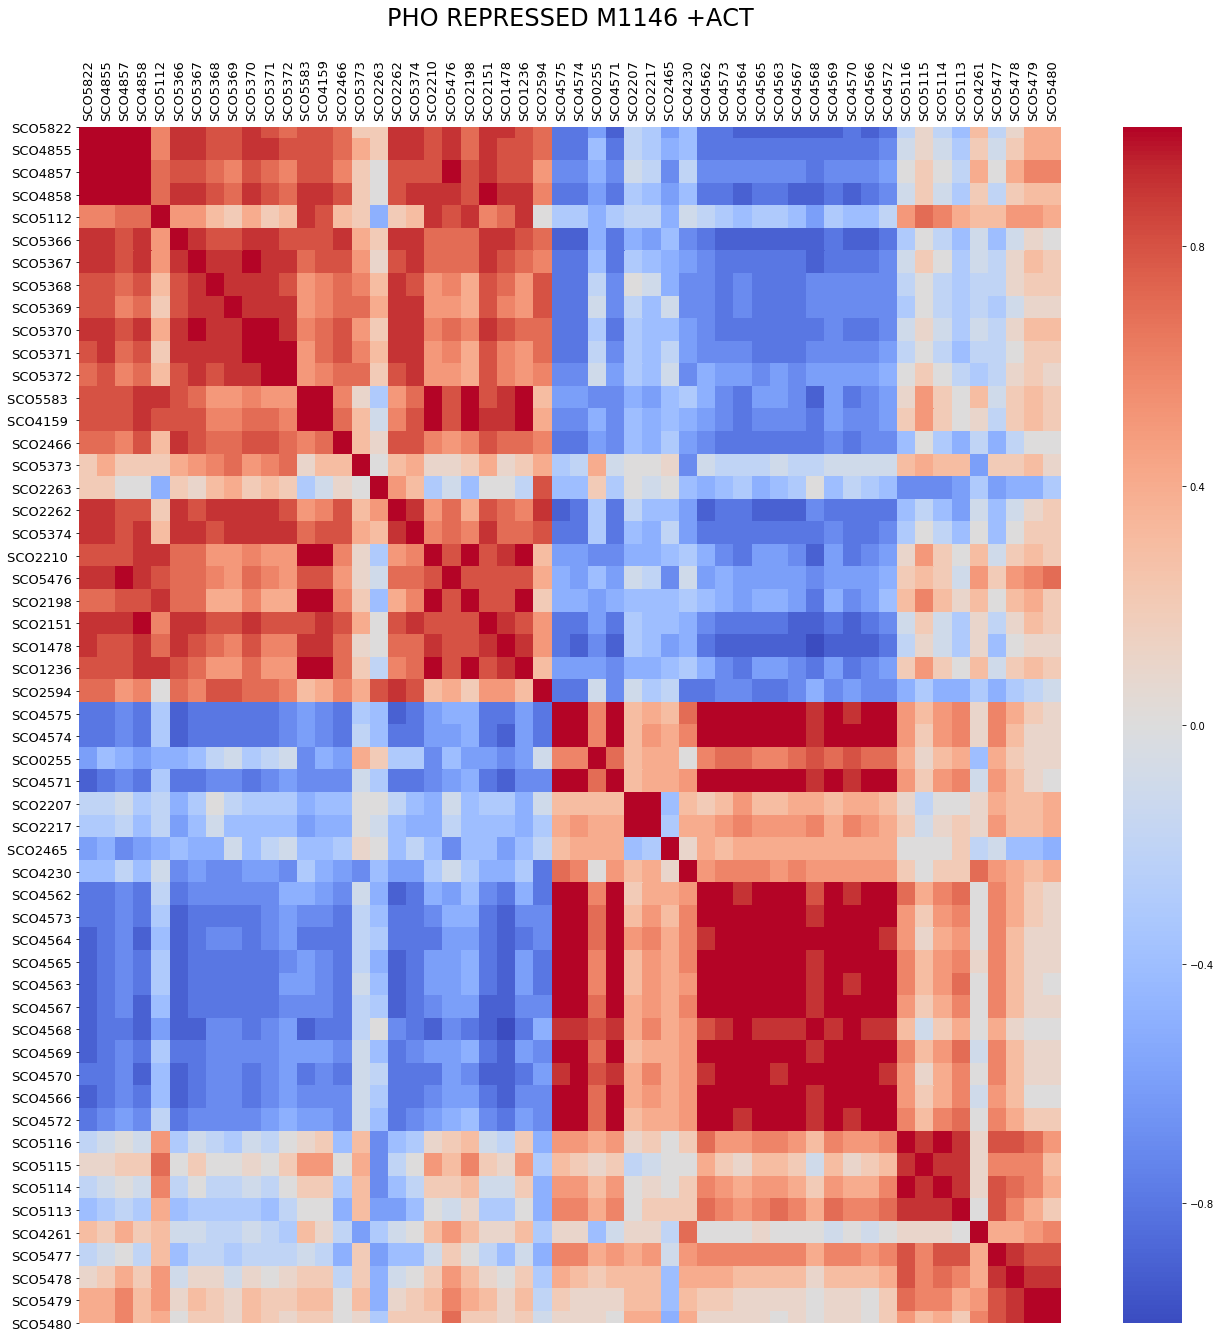

In [62]:
plt.figure(figsize=(22, 22))
plt.title('PHO REPRESSED M1146 +ACT', fontsize=24, y=1.08)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(range(df20.shape[1]), df20.columns, fontsize=13, rotation=90)
plt.yticks(range(df20.shape[1]), df20.columns, fontsize=13)
cbar_kws = {"shrink":1,
            'extend':'min', 
            'extendfrac':.1, 
            "drawedges":True}
sn.heatmap(df20, annot=False, linewidths=0, square = False, cmap = 'coolwarm', cbar=True)